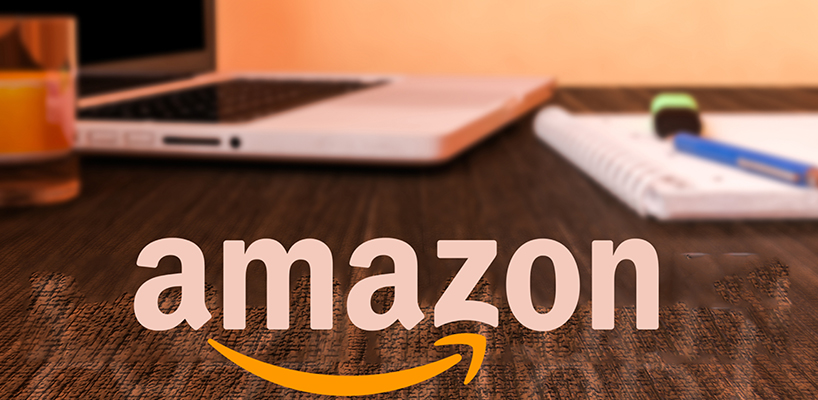

#      **Amazon Review Classification using NLP**

### Description

About Dataset
Content
India needs a boost to its economy that can also simultaneously transform local businesses. In order to support Indian brands, 'Vocal for Local' campaign was started in India. Emphasizing on a self-reliant, or ‘aatmanirbhar’, India, the Indian government has asked that products not just be made in India, but also for the promotion of local brands, manufacturing, and supply chain.

This dataset comprises of 2500+ reviews of about 100+ Indian Products pertaining to categories like hair and skin care products, clothes, electronic gadgets, etc from Amazon.

Column Description
asin : Amazon Standard Identification Number - a unique id for each product on Amazon

name : name of the product

date : date on which review was posted

rating : rating given to the product ( out of 5 )

review: review given to the product

## Data Description

📌 Asin     : Amazon Standard Identification Number – 
                      A unique id for each product on Amazon

📌 Name   : name of the product

📌 Date     : date on which review was posted

📌 Rating   : rating given to the product ( out of 5 )

📌 Review : review given to the product

### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

### Reading Data

In [7]:
data=pd.read_csv("amazon_vfl_reviews.csv")

In [8]:
data

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


### Exploratory Data Analysis(EDA)

In [9]:
for i in data.review:
    print('',i)

 I bought this hair oil after viewing so many good comments. But this product is not good enough.First of all it's Expensive...Second thing the amount of the product is low (half bottle) YES!The bottle is not completely filled with oil. If you cheating on your customers #Mamaearth trust me on this you can't fool people more than once. Now I know that your Brand is not good enough. I am not going to buy any product from your Brand again.Thumbs down for mamaearth onion oil !!
 Used This Mama Earth Newly Launched Onion Oil twice, and i must say im already impressed by the results !It prevents hair loss, helps control premature greying, dryness, dandruff, scalp eruptions and many other hair problems after its regular use !To avoid dry and frizzy hair, make sure that you use this oil to your hairs twice a week.Oiling provides your scalp with essential nutrients, and also strengthens the hair roots. Mamaearth onion oil works best for your hair during all the seasons.
 So bad product...My hai

In [10]:
data.name.value_counts()

Tata-Tea-Gold-500g                               60
Society-Tea-Masala-Jar-250g                      40
Godrej-Security-Solutions-SEEC9060-Electronic    40
Himalaya-Baby-Shampoo-400-ml                     40
Himalaya-Moisturizing-Aloe-Vera-200ml            40
                                                 ..
Patanjali-UHT-Milk-1000-ml                       10
Indiana-Frutti-Cherries-Frooti-Multicolor         6
Amul-Cow-Ghee-500ml                               4
Tata-Tea-Premium-1-5kg                            2
Patanjali-Ayurved-Ltd-CORO-NIL-Tablet             2
Name: name, Length: 122, dtype: int64

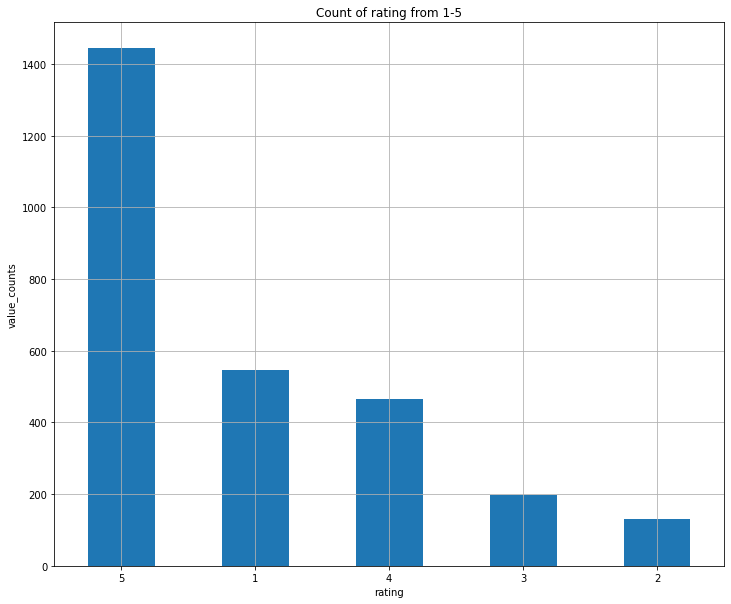

In [11]:
data.rating.value_counts().plot.bar(figsize=(12,10),title='Count of rating from 1-5')
plt.xlabel('rating')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

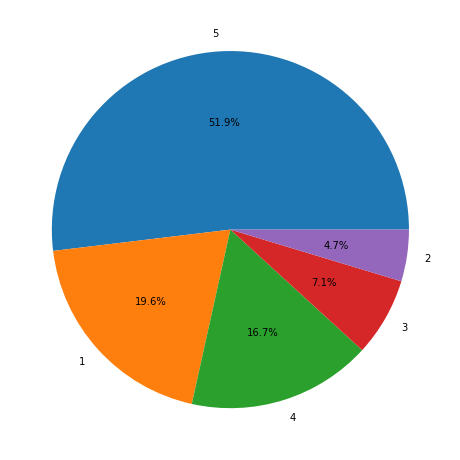

In [12]:
### checking value counts of 'Rating' in Percentage
plt.figure(figsize=(8,10))
df=data['rating'].value_counts()
keys=df.keys().to_list()
count=df.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

Conclusion-
From the above we can say that the maximum Rating has been given as 5 to the indian products i.e, approximatly 52% but still there are many customers who are not happy with the products and have given low rating

## Feature Engineering

In [13]:
# Separating the 'brands' from the 'product names'
data['brands']=data['name'].str.split('-').apply(lambda x: x[0])

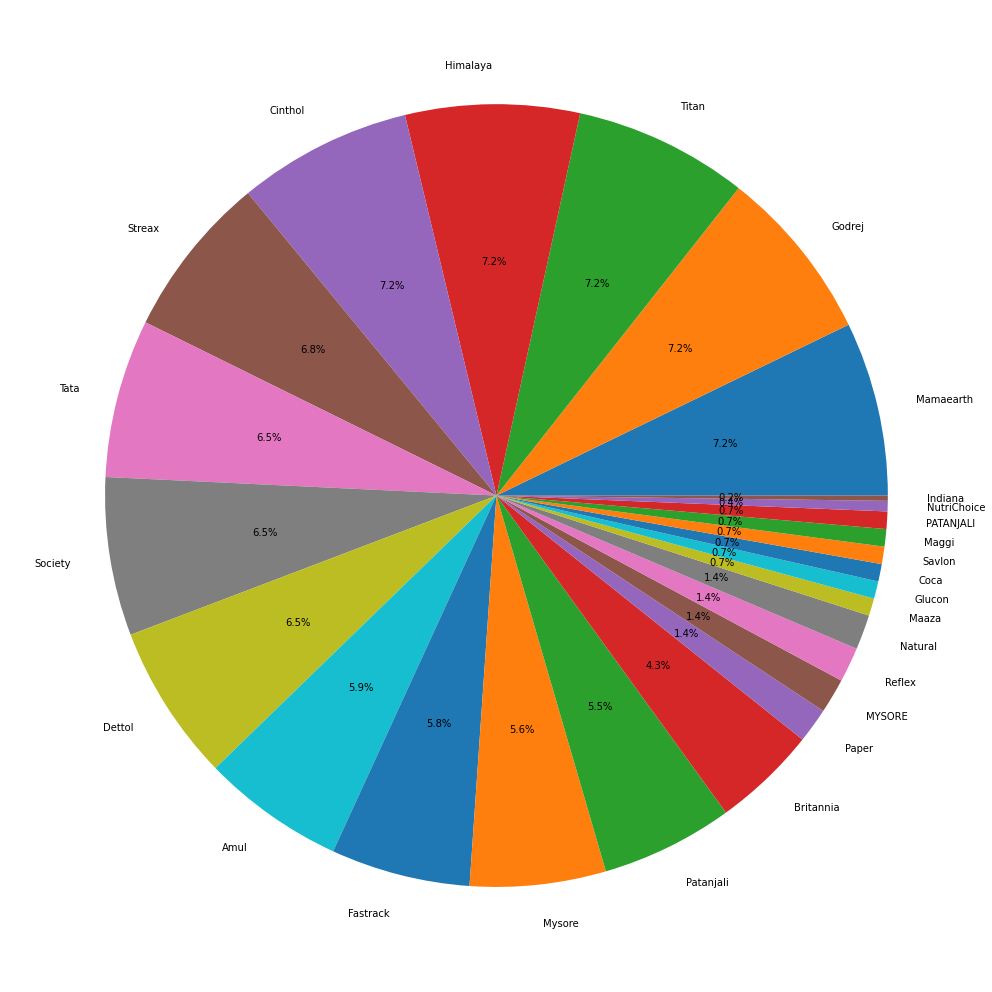

In [14]:
### checking value counts of 'brands' in Percentage
plt.figure(figsize=(18,18))
df=data['brands'].value_counts()
keys=df.keys().to_list()
count=df.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

In [15]:
data.columns

Index(['asin', 'name', 'date', 'rating', 'review', 'brands'], dtype='object')

In [16]:
# Dropping some of the columns since not required 
data.drop(['brands','asin', 'name', 'date'],axis=1,inplace=True)

In [17]:
data

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...
...,...,...
2777,5,Long lasting freshness throughout the day.
2778,5,My preferred soap
2779,2,ठीक नहीं लगा
2780,4,Super Product


### Checking missing values

In [18]:
# checking for null values
data.isnull().sum()

rating    0
review    4
dtype: int64

In [19]:
# getting the index with null values
data[data.review.isnull()].index

Int64Index([2248, 2258, 2631, 2641], dtype='int64')

In [20]:
# Reoving all the null values
data.dropna(axis=0,inplace=True)

In [21]:
data.isnull().sum()

rating    0
review    0
dtype: int64

In [22]:
# Reset the index 
data.reset_index(drop=True, inplace=True)
data

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...
...,...,...
2773,5,Long lasting freshness throughout the day.
2774,5,My preferred soap
2775,2,ठीक नहीं लगा
2776,4,Super Product


In [23]:

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Stop words are common words like ‘the’, ‘and’, ‘I’, etc. that are very frequent in text, and so don’t convey insights into the specific topic of a document. We can remove these stop words from the text in a given corpus to clean up the data, and identify words that are more rare and potentially more relevant to what we’re interested in.

In [24]:
stopword = nltk.corpus.stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#### Lemmatization refers to removing the inflectional endings of the word in order to get the base word or dictionary form of word which is called as lemma.

####  Example: ‘playing’, ‘played’, ‘plays’
####  The base word for the above example is ‘play’

In [28]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['review'][i]) # removing all the character other than alphabets
    review=review.lower()                  # Lowering all the cases 
    review=review.split()                  # spliting the sentence -> words for lemmatization
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] # removing stopwords
    review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
    corpus.append(review)                  # Appending to corpus
print(corpus)


['bought hair oil viewing many good comment product good enough first expensive second thing amount product low half bottle yes bottle completely filled oil cheating customer mamaearth trust fool people know brand good enough going buy product brand thumb mamaearth onion oil', 'used mama earth newly launched onion oil twice must say im already impressed result prevents hair loss help control premature greying dryness dandruff scalp eruption many hair problem regular use avoid dry frizzy hair make sure use oil hair twice week oiling provides scalp essential nutrient also strengthens hair root mamaearth onion oil work best hair season', 'bad product hair falling increase much order shampoo mask oil nothing stop hairfallafter 3 4 wash hair falling badly', 'product smell similar navarathna hair oil strong oil sticky applying three drop oil review usage 2 months1 worst product2 hair fall increased lot3 brought product watching youtube influencer mumbaiker nikhil4 totally misguided never tak

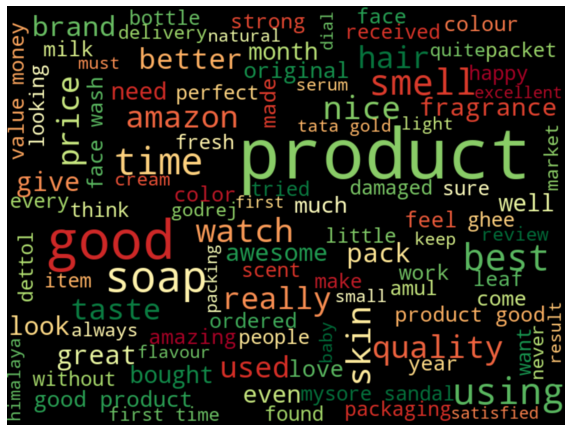

In [29]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 100,  
                       min_word_length = 4,
                       max_font_size = 100, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'quadric')
plt.axis('off')
plt.show()

# **Model Modelling**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

### **1:Using Bag of Words**

In [32]:
# Converting the Words to Vector using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken 
X=cv.fit_transform(corpus).toarray()
y=data['rating']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

# **Naive Bayes Model**

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [35]:
nb.fit(x_train,y_train)

MultinomialNB()

In [36]:
train_pred=nb.predict(x_train)

In [37]:
test_pred=nb.predict(x_test)

In [38]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           1       0.93      0.89      0.91       453
           2       0.74      0.95      0.83        81
           3       0.71      0.82      0.76       136
           4       0.63      0.84      0.72       277
           5       0.94      0.85      0.89      1275

    accuracy                           0.86      2222
   macro avg       0.79      0.87      0.82      2222
weighted avg       0.88      0.86      0.86      2222

              precision    recall  f1-score   support

           1       0.83      0.81      0.82       113
           2       0.35      0.69      0.46        13
           3       0.50      0.62      0.56        32
           4       0.63      0.73      0.68        79
           5       0.89      0.81      0.85       319

    accuracy                           0.78       556
   macro avg       0.64      0.73      0.67       556
weighted avg       0.81      0.78      0.79       556



### **Random Forest Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier()

In [41]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
train_pred=rfc.predict(x_train)

In [43]:
test_pred=rfc.predict(x_test)

In [44]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test)) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       437
           2       0.94      1.00      0.97        98
           3       0.96      1.00      0.98       152
           4       0.92      0.97      0.94       346
           5       0.99      0.97      0.98      1189

    accuracy                           0.98      2222
   macro avg       0.96      0.99      0.97      2222
weighted avg       0.98      0.98      0.98      2222

              precision    recall  f1-score   support

           1       0.97      0.92      0.95       115
           2       0.62      1.00      0.76        16
           3       0.90      1.00      0.95        36
           4       0.90      0.97      0.93        86
           5       0.99      0.94      0.96       303

    accuracy                           0.95       556
   macro avg       0.88      0.97      0.91       556
weighted avg       0.95      0.95      0.95       556



**Conclusion: Here we get a very good Model using 'Bag Of words' but Still the Semantic meaning will be missing So, to overcome this problem we are further going for TF-IDF Technique.**

In [45]:
print('Test 3')
test3 = ["if you ate not giving onion oil in your ad, it only has onion extracts ."]
test_vec = cv.transform(test3)
print('The Rating is :',rfc.predict(test_vec))

Test 3
The Rating is : [5]


# 2:Using Term Frequency-Inverse Document Frequency

#### Term frequency-inverse document frequency is a numerical statistic that intends to identify how relevant a word is to a document  in a collection of documents

In [46]:
# Converting the Words to Vector using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
X=tf.fit_transform(corpus).toarray()

In [48]:
tf.vocabulary_

{'bought': 285,
 'hair': 948,
 'oil': 1453,
 'many': 1279,
 'good': 887,
 'comment': 444,
 'product': 1641,
 'enough': 677,
 'first': 790,
 'expensive': 714,
 'second': 1918,
 'thing': 2227,
 'amount': 117,
 'low': 1247,
 'half': 961,
 'bottle': 278,
 'yes': 2492,
 'completely': 455,
 'filled': 780,
 'cheating': 394,
 'customer': 496,
 'mamaearth': 1269,
 'trust': 2289,
 'people': 1543,
 'know': 1109,
 'brand': 293,
 'going': 879,
 'buy': 329,
 'thumb': 2238,
 'onion': 1480,
 'hair oil': 956,
 'product good': 1663,
 'good enough': 897,
 'cheating customer': 395,
 'brand good': 296,
 'going buy': 880,
 'buy product': 332,
 'onion oil': 1481,
 'used': 2339,
 'mama': 1266,
 'earth': 653,
 'newly': 1416,
 'launched': 1127,
 'twice': 2299,
 'must': 1379,
 'say': 1897,
 'im': 1039,
 'already': 92,
 'impressed': 1044,
 'result': 1846,
 'loss': 1230,
 'help': 989,
 'control': 470,
 'dandruff': 508,
 'scalp': 1898,
 'problem': 1639,
 'regular': 1817,
 'use': 2325,
 'avoid': 163,
 'dry': 635,
 '

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [50]:
nb.fit(x_train,y_train)

MultinomialNB()

In [51]:
train_pred=nb.predict(x_train)

In [52]:
test_pred=nb.predict(x_test)

In [53]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           1       0.84      0.91      0.87       399
           2       0.03      1.00      0.06         3
           3       0.19      1.00      0.32        30
           4       0.28      0.94      0.43       110
           5       1.00      0.69      0.81      1680

    accuracy                           0.74      2222
   macro avg       0.47      0.91      0.50      2222
weighted avg       0.92      0.74      0.80      2222

              precision    recall  f1-score   support

           1       0.72      0.91      0.81        87
           2       0.04      1.00      0.07         1
           3       0.10      1.00      0.18         4
           4       0.25      0.96      0.40        24
           5       1.00      0.66      0.79       440

    accuracy                           0.71       556
   macro avg       0.42      0.90      0.45       556
weighted avg       0.92      0.71      0.77       556



In [54]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
train_pred=rfc.predict(x_train)

In [56]:
test_pred=rfc.predict(x_test)

In [57]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       437
           2       0.94      1.00      0.97        98
           3       0.98      0.97      0.98       159
           4       0.90      0.99      0.94       335
           5       1.00      0.96      0.98      1193

    accuracy                           0.98      2222
   macro avg       0.96      0.99      0.97      2222
weighted avg       0.98      0.98      0.98      2222

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       117
           2       0.62      1.00      0.76        16
           3       0.93      0.95      0.94        39
           4       0.89      0.99      0.94        83
           5       0.98      0.94      0.96       301

    accuracy                           0.94       556
   macro avg       0.88      0.96      0.91       556
weighted avg       0.95      0.94      0.94       556



### Conclusion: So, by using the algorithm as Random Forest Classifier we are getting a very good model having a Good Precison,Recall and Accuracy So, we can Conclude that the 'Review' and the 'Rating' are very much Similar provided by the Customers

# **Checking if the Model is Good or not.**

In [58]:
print('Test 1')
test1 = ["shampoo mask and oil. nothing stop hairfallAfter 3 to 4 wash my hair falling so badly ."]
test_vec = tf.transform(test1)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 1
The Predicted Rating is : [1]


In [59]:
print('Test 2')
test2 = ["I used it only one time so I can't say about hairfall control . it made my hair extremely soft and shiny ."]
test_vec = tf.transform(test2)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 2
The Predicted Rating is : [5]


In [60]:
print('Test 3')
test3 = ["""Product just smells similar to navarathna hair oil .. 
         but not strong as that and oil is not sticky after applying three drops of oil !! 
         More review after usage of 2 months
         1) worst product
         2) hair fall increased a lot
         3) brought this 
         product after watching YouTube influencer Mumbaiker Nikhil
         4) totally misguided never take suggestions from influencers.
         5)using since 2 months no result and I'm losing my more hair
         6) mama earth just wasted my money as well damaged my hair
         7)better they provide solution or return my money"""]
test_vec = tf.transform(test3)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 3
The Predicted Rating is : [1]


In [61]:
print('Test 4')
test2 = ["""The first half of the innings was boring as their were no proper shot played by batsman. 
         It was a slow start however as we approached 40th over batsman shift gears and scored a lot of runs """]
test_vec = tf.transform(test2)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 4
The Predicted Rating is : [4]


### **Hence,Predicted Rating with respect to Reviews Given by the Customer on the Products are Accurate.**